## **Predicción de precios de casas**

El siguiente proyecto consiste en crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:

**$ y = f(x) =  mx+b $**

Donde:

$y$ = la variable dependiente\
$x$ = variable independiente\
$m$ = pendiente de la recta(parámetro del modelo)\
$b$ = intercepto(parámetro del modelo)

Se trabajara con un set de datos de muchas variables y se realiza un análisis exploratorio para visualizar y analizar los datos y entender cómo se comportan y luego  elegir las variables independientes “x” a trabajar(según el potencial predictivo de estas a través de medir la correlación), esto significa que aunque el dataset posee múltiples variables, en vez de crear un modelo multi-variable crearemos múltiples modelos uni-variable.


### **Importing Libraries**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Importing Data**

In [9]:
datos = np.load("Dataset/proyecto_training_data.npy")
columnas = ["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"]
datos_frame = pd.DataFrame(datos,columns=columnas)

### **Análisis Exploratorio**

In [10]:
datos_frame.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


Se muestra que a la columna $LotFrontage$ le faltan 259 valores. Los valores faltantes o nan Estos serán reemplazados con la media (70.049958).

In [14]:
inds = np.where(np.isnan(datos))
inds

(array([   7,   12,   14,   16,   24,   31,   42,   43,   50,   64,   66,
          76,   84,   95,  100,  104,  111,  113,  116,  120,  126,  131,
         133,  136,  147,  149,  152,  153,  160,  166,  169,  170,  177,
         180,  186,  191,  203,  207,  208,  214,  218,  221,  234,  237,
         244,  249,  269,  287,  288,  293,  307,  308,  310,  319,  328,
         330,  335,  342,  346,  347,  351,  356,  360,  361,  364,  366,
         369,  370,  375,  384,  392,  393,  404,  405,  412,  421,  426,
         447,  452,  457,  458,  459,  465,  470,  484,  490,  496,  516,
         518,  529,  537,  538,  539,  541,  545,  559,  560,  564,  569,
         580,  593,  610,  611,  612,  616,  623,  626,  641,  645,  660,
         666,  668,  672,  679,  682,  685,  687,  690,  706,  709,  714,
         720,  721,  726,  734,  745,  746,  751,  757,  770,  783,  785,
         789,  791,  794,  811,  816,  817,  822,  828,  840,  845,  851,
         853,  855,  856,  859,  865, 

Se confirma que la única columna con datos faltantes es la número $5$, $LotFrontage$.  Por lo que se procederá a reemplazar los valores faltantes por la media.

### **Remplazar datos faltantes**

In [6]:
datos = np.nan_to_num(datos,nan=70.049958)
datos_frame = pd.DataFrame(datos,columns=columnas)

Ahora sí, el dataset no contiene datos faltantes.

### **Análisis Exploratorio sin datos faltantes**
En los requerimientos del proyecto únicamente se solicita media, max, min, rango y desviación estándar.  Se ajustará para presentar únicamente estos datos de Estadística Descriptiva.

In [15]:
df_describe = datos_frame.describe() 
df_describe = df_describe.append(pd.Series(datos_frame.max()-datos_frame.min(),name="range")) # adding range
df_describe = df_describe.drop(["count","25%","50%","75%"]) #eliminamos datos no solicitados.
df_describe

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
range,720100.000000,9.000000,4358.000000,12.000000,138.000000,292.000000


### **Spliting data in train and testing dataset**
Por medio de slicing se procede a dividir el dataset original en dos subsets, train para entrenamiento y test para pruebas.

In [41]:
#Training = 1460 * 0.80 = 1168
train, test = datos[:1168,:], datos[1168:,:]
print("Training size:",train.shape)
print("Testing size:",test.shape)

Training size: (1168, 6)
Testing size: (292, 6)


### **Histograma de variables**

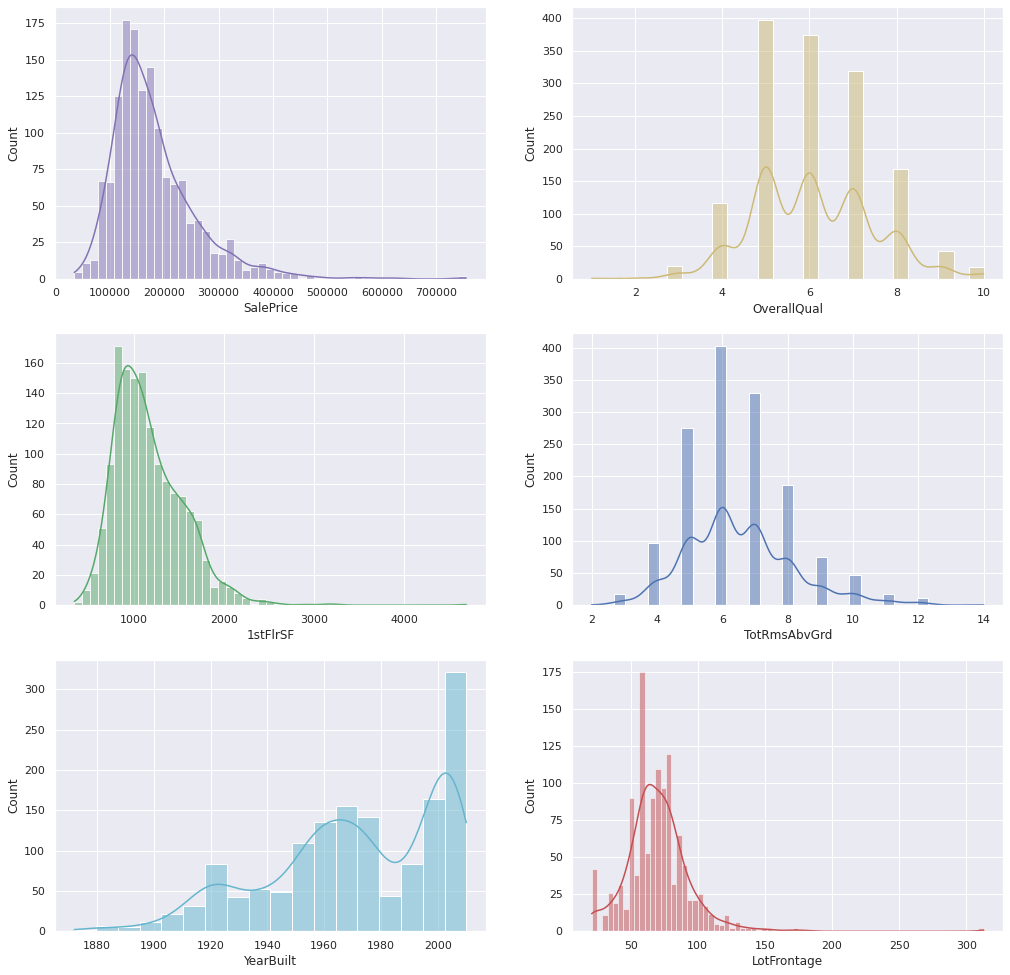

In [67]:
colors = ["m","y","g","b","c","r"]
f,axes = plt.subplots(3,2,sharex=False, figsize=(17,17))

# // -> Floor division, % modulus
for i in range(0,len(columnas)): 
    sns.histplot(datos_frame[columnas[i]] , color=colors[i], kde=True, ax=axes[i//2, i%2])
    
plt.show()



### **Correlación**

In [71]:
correlation = []
for i in range(1,len(columnas)): #SalePrice es la columna 0
    correlation.append(datos_frame[columnas[0]].corr(datos_frame[columnas[i]]))

corr = pd.Series(correlation, name=columnas[0], index=columnas[1:])
corr.to_frame().T

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,0.790982,0.605852,0.533723,0.522897,0.351799


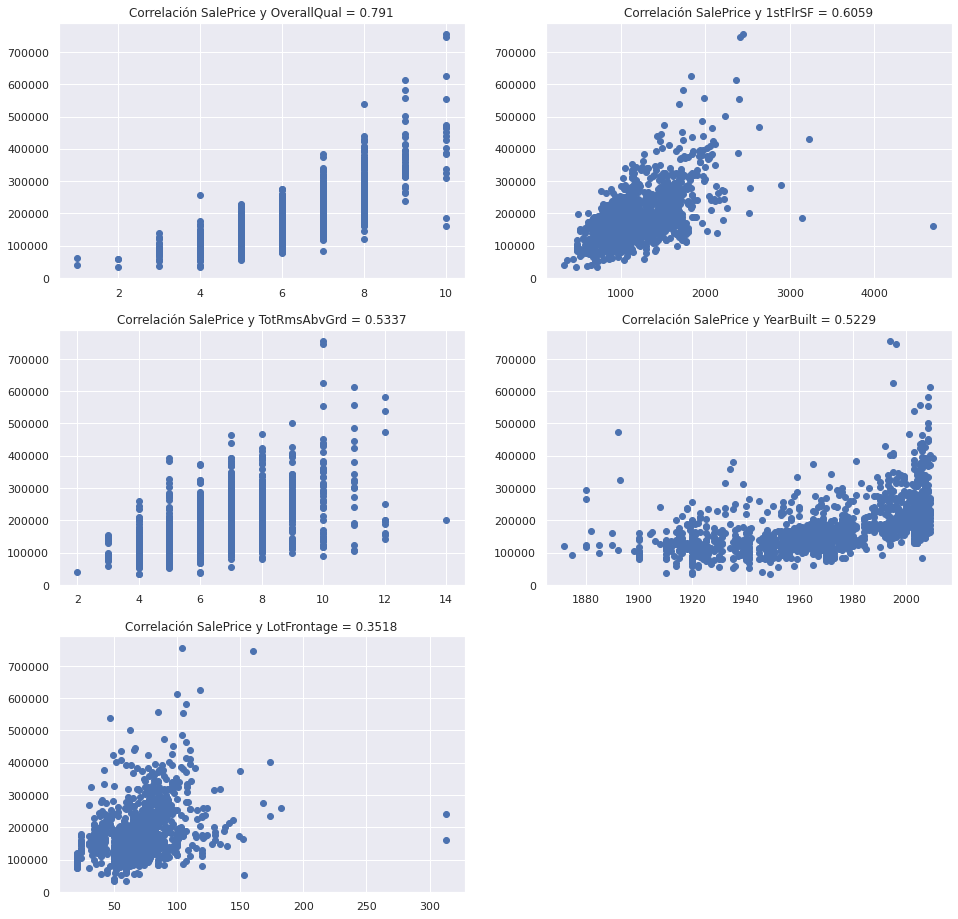

In [86]:
f,axes = plt.subplots(3,2,sharex=False, figsize=(16,16))
f.delaxes(axes[2,1]) # Son 5 gráficas, por lo que eliminamos el espacio (2,1)

for i in range(1,len(columnas)):
    plt.subplot(3,2,i)
    plt.scatter(datos_frame[columnas[i]], datos_frame[columnas[0]])
    plt.title("Correlación SalePrice y "+ columnas[i] +" = " + str(round(corr[columnas[i]],4))) 

plt.show()

Se observa que las dos variables con mayor correlación son **$OverallQual$** y **$1stFlrSF$**